# Example: Nonlinear system

Consider the nonlinear differential equation

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
2 x(t) - x(t) ~ y(t) \\
3 x(t) ~ y(t) - 9 y(t)
\end{pmatrix}
$$

with intial value 

$$
\begin{pmatrix}
x(0) \\
y(0)
\end{pmatrix}
=
\begin{pmatrix}
x_{0} \\
y_{0}
\end{pmatrix}
$$

## Equilibrium points

The equlibrium point of the nonlinear system are found with

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0
\end{pmatrix}
=
\begin{pmatrix}
x ~ (2 - y ) \\
(3 x - 9 ) ~ y
\end{pmatrix}
$$

Consequently, two equilibrium points exist:
*  $ (x_{0,1}, y_{0,1}) = (0, 0) $
*  $ (x_{0,2}, y_{0,2}) = (3, 2) $


##  Forward Euler approximation

The forward [Euler method](https://en.wikipedia.org/wiki/Euler_method) 

$$
\dot{x}(t) = \frac{x(t + \Delta T) - x(t)}{\Delta T} = \frac{x_{n+1} - x_{n}}{\Delta T}
$$

is applied on the nonlinear system to gain

$$
\begin{pmatrix}
x_{n+1} \\
y_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
x_{n} + \Delta T (2 x_{n} - x_{n} ~ y_{n} ) \\
y_{n} + \Delta T (3 x_{n} ~ y_{n} - 9 y_{n} )
\end{pmatrix}
$$

### Simulation and phase plane

The resulting nonlinear difference equation is simulated with sampling time $\Delta T = 0.001$ and initial value $(x_{0}, y_{0}) = (2, 1)$.



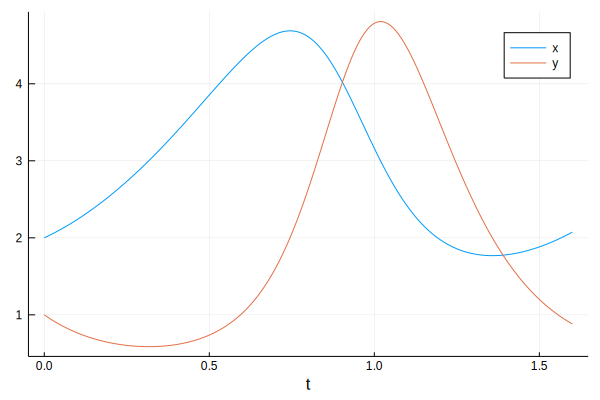

In [25]:
f(x,ΔT) = [x[1] + ΔT *x[1]*( 2 - x[2]); x[2] + ΔT*x[2]*(3*x[1] - 9)] # Nonlinear difference equation

x₀ = [2.0; 1.0]; # Initial value
Ts = 0.001; # Sampling time
Tf = 1.6; # Final simulation time

tspan = 0 : Ts : Tf; # Time span or interval

x_sol = zeros(2, length(tspan)); # Solution vector
x_sol[:, 1] = x₀;

for i=1 : length(tspan)-1
    x_sol[:, i+1] = f(x_sol[:, i], Ts);
end

using Plots;
gr();

plot( tspan, x_sol[1,:], xaxis="t", label="x")
plot!( tspan, x_sol[2,:], label="y")


The **phase plane** summarizes the x- and y-points in a single graph.

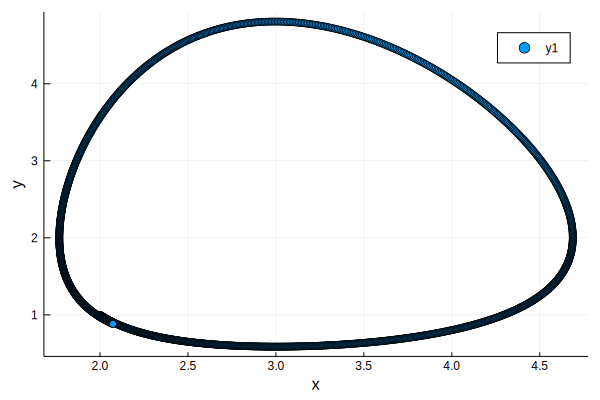

In [27]:
scatter( x_sol[1,:], x_sol[2,:], xaxis="x", yaxis="y")

### Attractors and Deflectors

The approximated dynamical system is used to check whether the equilibrium points are attractors or deflectors. Small disturbances $\varepsilon$ are add to the equilibrium points to check if the trajectory returns to the equilibrium points. 


The resulting plot shows that the equilibrium points are **deflectors**.



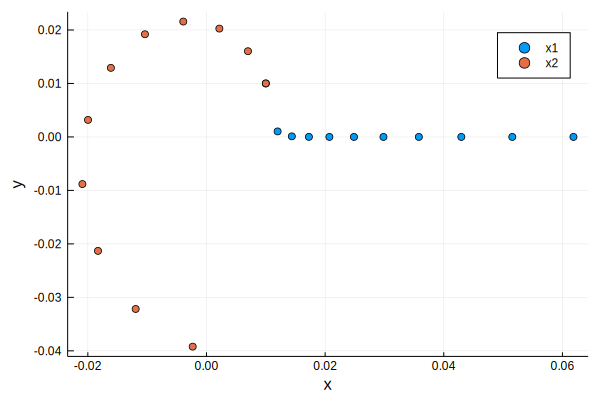

In [28]:
x₁ = [0 ; 0] # Equilibrium at the origin
x₂ = [3 ; 2] # Second equilibrium

ε = [0.01 ; 0.01]; # Small disturbance

T = 0.1 # Sampling time

f(x,ΔT) = [x[1] + ΔT *x[1]*( 2 - x[2]); x[2] + ΔT*x[2]*(3*x[1] - 9)] # Nonlinear difference equation

Nsteps = 10; # Number of time steps
x1N = zeros(length(x₁), Nsteps+1); # Solution trajectory for first equilibrium point
x2N = zeros(length(x₁), Nsteps+1); # Solution trajectory for second equilibrium point

x1N[:, 1] = x₁ + ε;
x2N[:, 1] = x₂ + ε;

for i = 1 : Nsteps
   x1N[:, i+1] = f(x1N[:,i], T)
   x2N[:, i+1] = f(x2N[:,i], T)
end

# Error from initial value
err1 = x1N .- x₁; 
err2 = x2N .- x₂;

scatter(err1[1,:], err1[2,:], xaxis="x", yaxis="y", label="x1")
scatter!(err2[1,:], err2[2,:], label="x2")


## Linearization

The nonlinear system 

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
=
\begin{pmatrix}
x ~ (2 - y ) \\
(3 x - 9 ) ~ y
\end{pmatrix}
= f((x,y),t)
$$

is [linearized](https://en.wikipedia.org/wiki/Linearization) at $ (x_{0}, y_{0}) = (2,1) $ with 

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
\approx
f( (x_{0}, y_{0}), t) +
 \left. \nabla f((x,y),t) \right\rvert_{(x,y)=(x_{0}, y_{0})} 
 \begin{pmatrix}
x - x_{0} \\
y - y_{0}
\end{pmatrix}
$$

to yield 

$$
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
\approx
\begin{pmatrix}
2 \\
-3
\end{pmatrix}
+
\left.
\begin{pmatrix}
(2 - y ) & -x \\
3 y & (3 x - 9 )
\end{pmatrix}
\right\rvert_{(2,1)}
 \begin{pmatrix}
x - 2 \\
y - 1
\end{pmatrix}
$$

Finally, the linearized time-invariant system is derived as

$$
\begin{pmatrix}
\dot{\tilde{x}}(t) \\
\dot{\tilde{y}}(t)
\end{pmatrix}
=
\begin{pmatrix}
2 \\
-6
\end{pmatrix}
+
\begin{pmatrix}
1 & -2 \\
3 & -3
\end{pmatrix} ~
 \begin{pmatrix}
x  \\
y 
\end{pmatrix}
$$

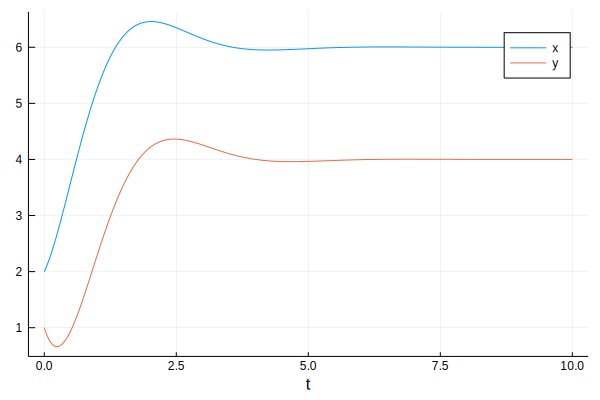

In [32]:
f(x,ΔT) = [x[1] + ΔT *( 2  + x[1] - 2*x[2] ); x[2] + ΔT*(-6 + 3*x[1] - 3*x[2])] # Linearized difference equation

x₀ = [2.0; 1.0]; # Initial value
Ts = 0.001; # Sampling time
Tf = 10.0; # Final simulation time

tspan = 0 : Ts : Tf; # Time span or interval

x_sol_approx = zeros(2, length(tspan)); # Solution vector
x_sol_approx[:, 1] = x₀;

for i=1 : length(tspan)-1
    x_sol_approx[:, i+1] = f(x_sol_approx[:, i], Ts);
end

using Plots;
gr();

plot( tspan, x_sol_approx[1,:], xaxis="t", label="x")
plot!( tspan, x_sol_approx[2,:], label="y")

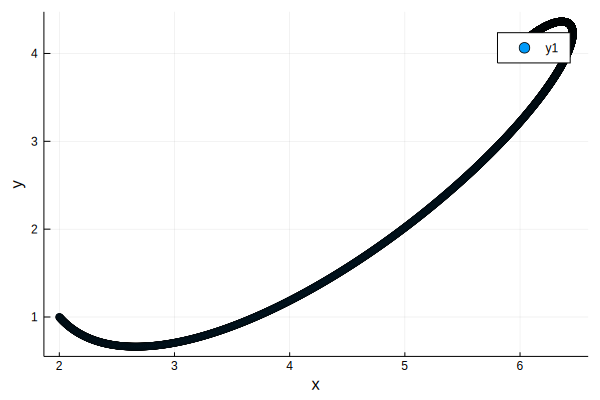

In [33]:
scatter( x_sol_approx[1,:], x_sol_approx[2,:], xaxis="x", yaxis="y")